# Bootstrap

### Objective
The objective of this task is to learn about the bootstrap method and its application for estimating the average.

## 1. Bootstrap Resampling
**Bootstrap resampling** is a statistical method used to estimate the distribution of statistics by repeatedly and randomly sampling from an existing dataset. This method approximates the distribution of statistics, allowing for inferences about the accuracy of their estimates.

Steps of bootstrap resampling:
1. **Original Dataset:**
    - Begin with an original dataset that serves as the basis for the statistical estimation.
2. **Random Sampling:**
    - Randomly and with replacement, generate new subsamples (resamples) from the original
dataset. Each resample has the same size as the original dataset.
3. **Statistical Estimation:**
    - Calculate the desired statistic (e.g., mean, median, standard deviation, etc.) for each resample.
4. **Repeat the Process:**
    - Repeat these steps numerous times (often thousands of times) to obtain a distribution of the
statistic estimates.
5. **Analyzing the Distribution:**
    - Based on the resulting distribution of statistic estimates, confidence intervals can be constructed,
standard errors can be estimated, and other statistical analyses can be performed.

## 2. Bootstraping - How Many Times?

The **number of times for bootstrapping** depend on several factors, such as the desired accuracy of the estimation and the characteristics of the data. However, generally, a commonly used number of bootstrapped resamples is between 1000 and 10000.

The choice of a specific value may depend on the following factors:
1. **Computational Resources:**
    - A larger number of resamples requires more computational resources. If computations take too much time, a smaller number of resamples can be used. However, reducing the number of resamples should be done cautiously as it may compromise the accuracy of the estimation.
2. **Data Characteristics:** 
    - In cases where the data has significant outliers or heterogeneity, more resamples may be needed to ensure stability and accuracy of the estimates.
3. **Accuracy of Estimation:** 
    - If a very accurate estimate is required, more resamples can be used. However, it's important to note that as the number of resamples increases, the marginal gains in accuracy diminish, and additional computational costs may not yield substantial benefits.

## 3. Observations & Conclusions

1. **Distribution Changes**: 
   - As sample size increases, the histogram of the original sample becomes smoother and more closely approximates the uniform distribution.
   - The distribution of the bootstrap sample means becomes more concentrated around the true mean.

2. **Mean Calculations**:
   - The theoretical mean remains constant at 5.
   - The mean of the original sample and the mean of the bootstrap sample means converge to the theoretical mean as sample size increases.

3. **Confidence Interval**:
   - The 95% confidence interval for the mean becomes narrower as sample size increases, indicating increased precision in the estimate of the mean with larger sample sizes.

These results demonstrate that larger sample sizes provide more reliable estimates of the population mean and narrower confidence intervals, reflecting increased statistical precision.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
plt.style.use("fivethirtyeight")

In [8]:
### Functions to use in the experiment

def bootstrap_mean(sample, n_bootstrap=1000):
    """ Perform bootstrapping and return the means of bootstrap samples. """
    bootstrap_means = np.array([np.mean(np.random.choice(sample, size=len(sample), replace=True)) for _ in range(n_bootstrap)])
    return bootstrap_means

def calculate_statistics(N, n_bootstrap=1000):
    """ Generate sample, perform bootstrapping, and calculate required statistics. """
    # Generate a sample from a uniform distribution
    sample = np.random.uniform(0, 10, N)
    
    # Perform bootstrapping
    bootstrap_means = bootstrap_mean(sample, n_bootstrap)
    
    # Calculate means
    theoretical_mean = 5  # The mean of a uniform distribution [0, 10]
    original_sample_mean = np.mean(sample)
    bootstrap_mean_value = np.mean(bootstrap_means)
    
    # Calculate 95% confidence interval
    confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])
    
    # Plot histograms
    plt.figure(figsize=(16, 9))
    plt.hist(sample, bins=20, alpha=0.5, label='Original Sample')
    plt.hist(bootstrap_means, bins=20, alpha=0.5, label='Bootstrap Means')
    plt.axvline(theoretical_mean, color='red', linestyle='dashed', linewidth=1, label='Theoretical Mean')
    plt.axvline(original_sample_mean, color='blue', linestyle='dashed', linewidth=1, label='Original Sample Mean')
    plt.axvline(bootstrap_mean_value, color='green', linestyle='dashed', linewidth=1, label='Bootstrap Mean')
    plt.title(f'Distribution of Sample and Bootstrap Means for Sample Size = {N}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    return theoretical_mean, original_sample_mean, bootstrap_mean_value, confidence_interval

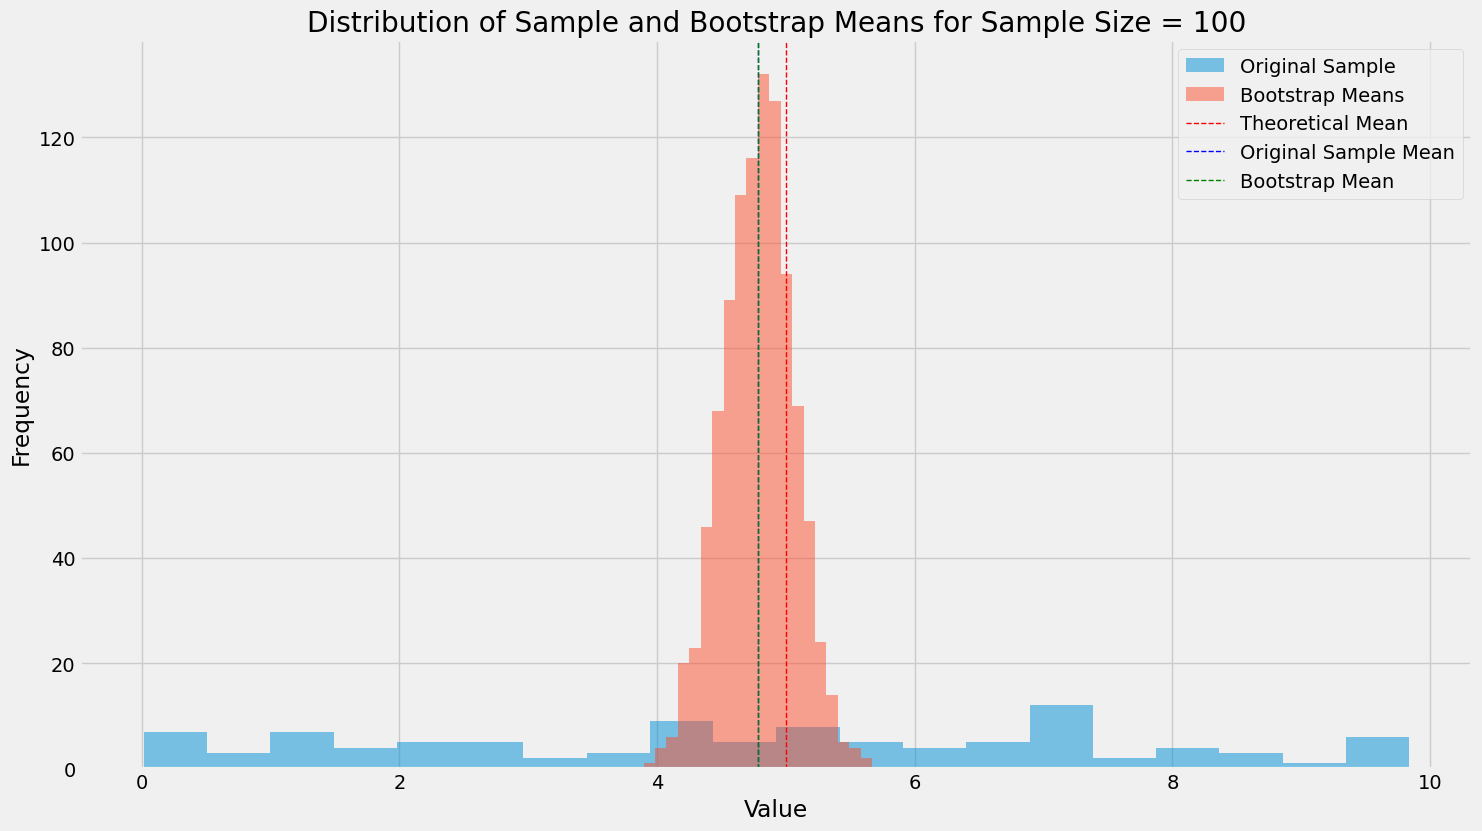

Sample Size = 100
Theoretical Mean: 5
Original Sample Mean: 4.780569434432541
Bootstrap Mean: 4.7843935984825645
95% Confidence Interval: [4.22853391 5.30624164]






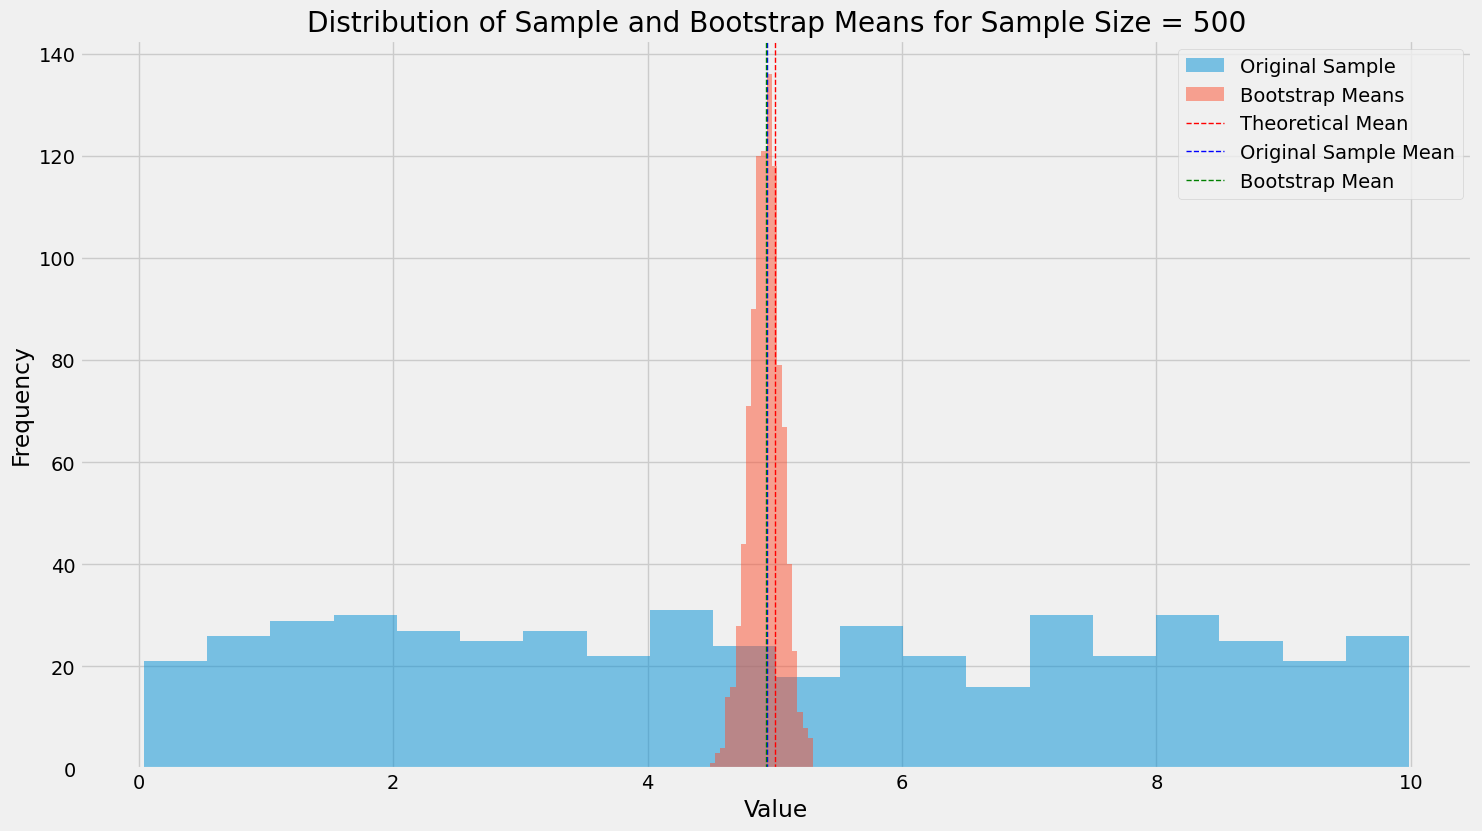

Sample Size = 500
Theoretical Mean: 5
Original Sample Mean: 4.9363272457092435
Bootstrap Mean: 4.9273585635939945
95% Confidence Interval: [4.65874274 5.17855844]






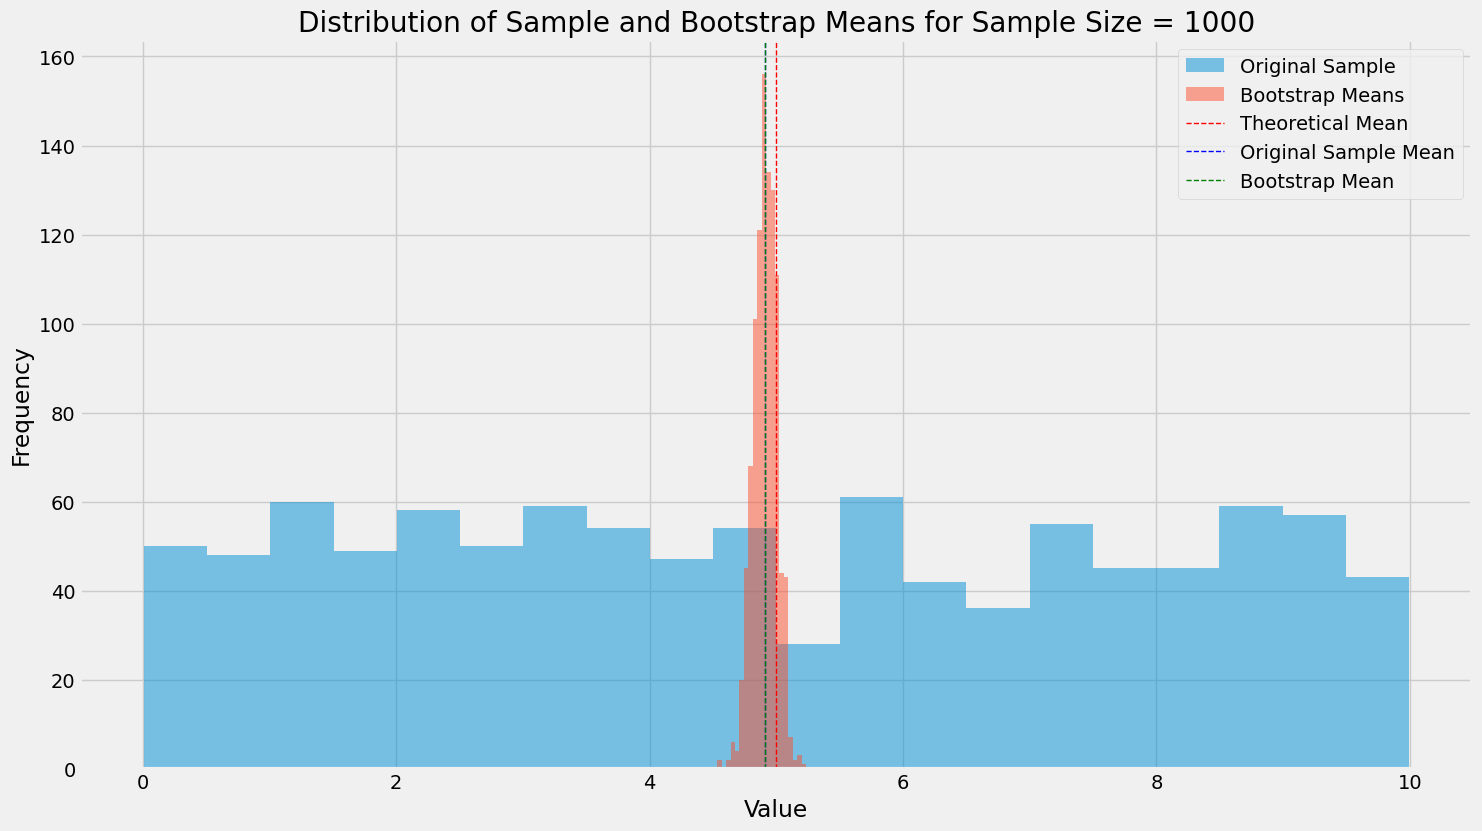

Sample Size = 1000
Theoretical Mean: 5
Original Sample Mean: 4.909799082279344
Bootstrap Mean: 4.911911513576974
95% Confidence Interval: [4.73438474 5.0786896 ]






In [11]:
# Values of sample sizes to test
N_values = [100, 500, 1000]

for N in N_values:
    theoretical_mean, original_sample_mean, bootstrap_mean_value, confidence_interval = calculate_statistics(N)
    print(f"Sample Size = {N}")
    print(f"Theoretical Mean: {theoretical_mean}")
    print(f"Original Sample Mean: {original_sample_mean}")
    print(f"Bootstrap Mean: {bootstrap_mean_value}")
    print(f"95% Confidence Interval: {confidence_interval}")
    print("\n\n\n")